In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv("/content/Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [5]:
data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [7]:
#Analyzing Instagram Reach

<ipython-input-8-0b80395bcf69>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


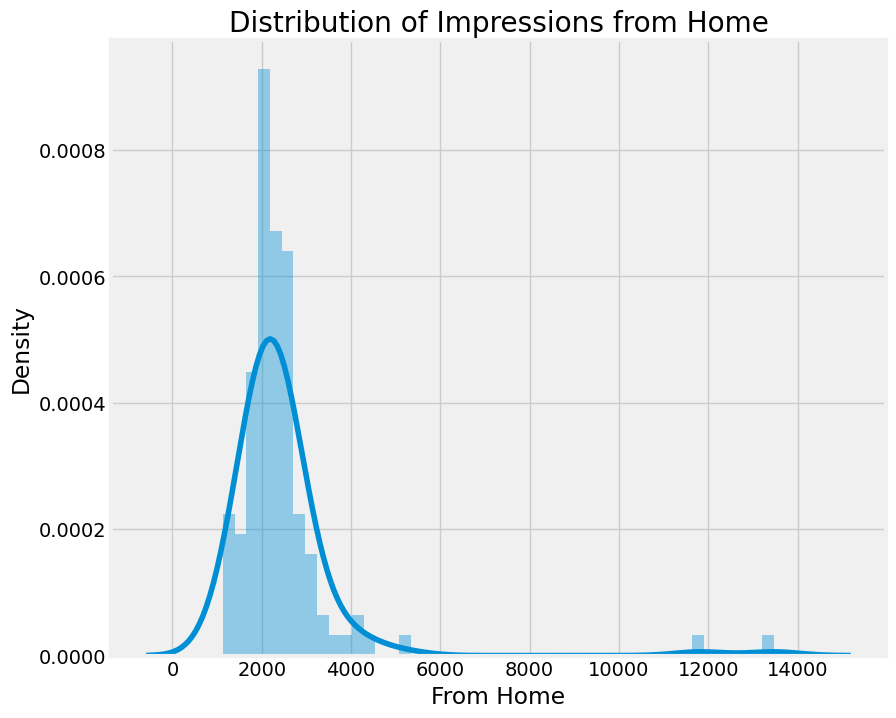

In [8]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.show()

In [9]:
#The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, it's hard to reach all my followers daily. Now, let's look at the distribution of the impressions that I received from hashtags.

<ipython-input-10-3f5009139d3d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


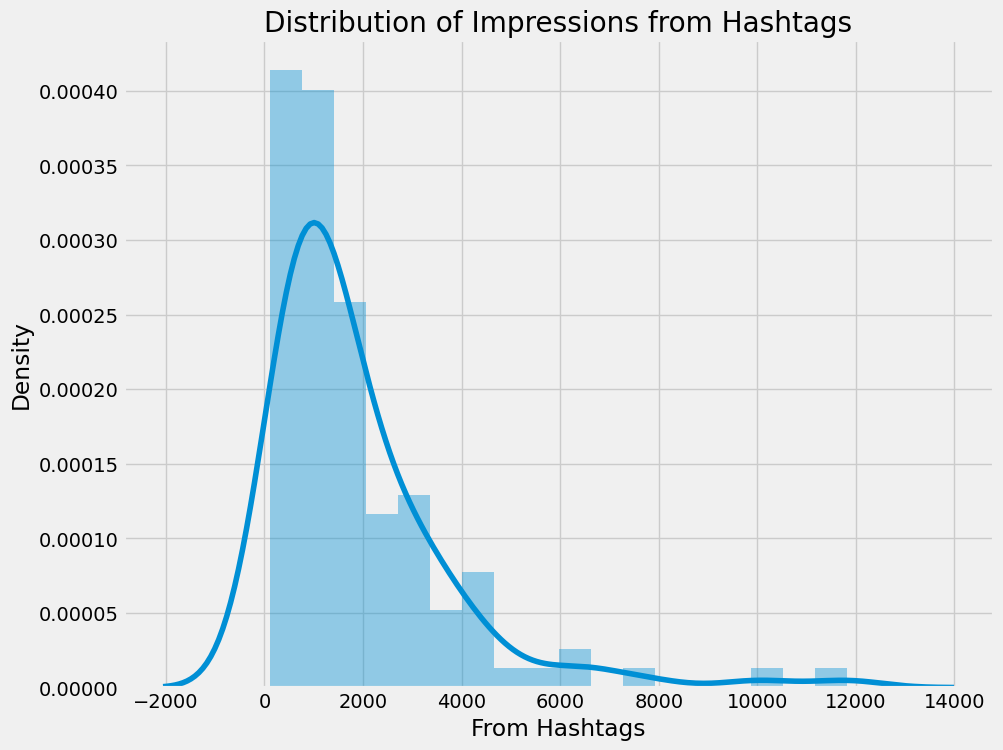

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

In [11]:
#Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtags impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. Now, let's look at the distribution of impressions that I have received from the explore section of Instagram.

<ipython-input-12-0a89e3764b7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


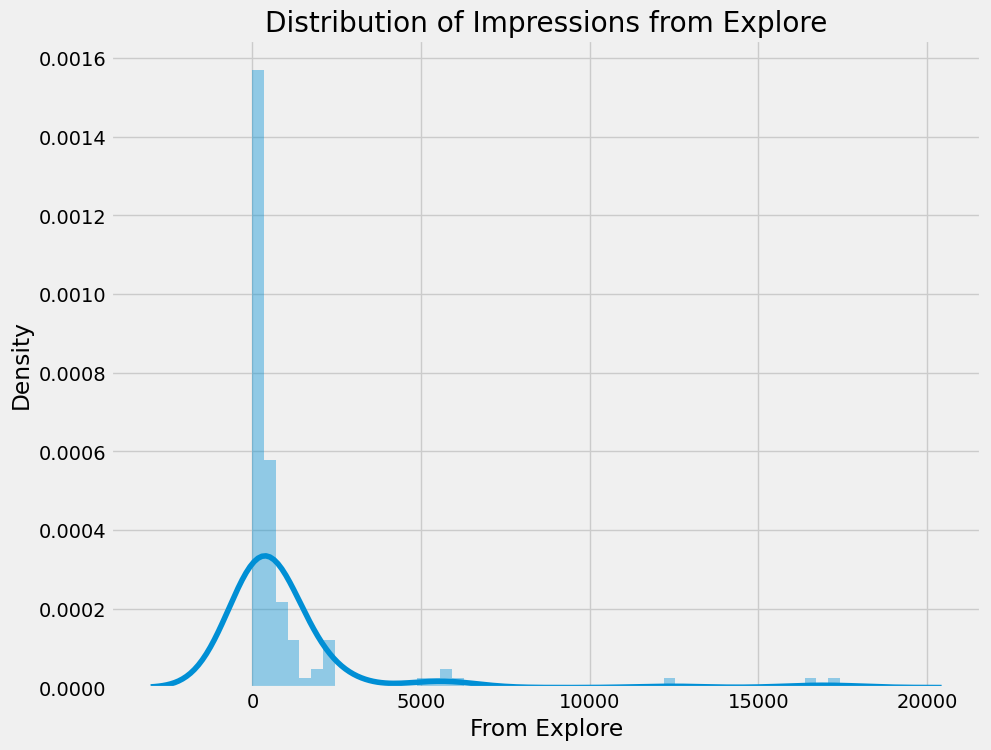

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

In [13]:
#The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions that I have received from the explore section, I can say that Instagram doesn't recommend our posts much to the users. Some posts have received a good reach from the explore section, but it's still very low compared to the reach I receive from hashtags.

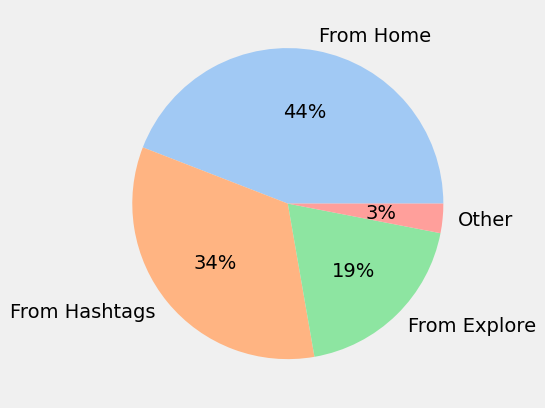

In [14]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]
palette_color = sns.color_palette('pastel')

plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

In [15]:
#As we can see, 44 percent of the reach is from my followers, 34 percent is from hashtags, 19 percent is from the explore section, and 3 percent is from other sources.

In [16]:
#Analyzing Content

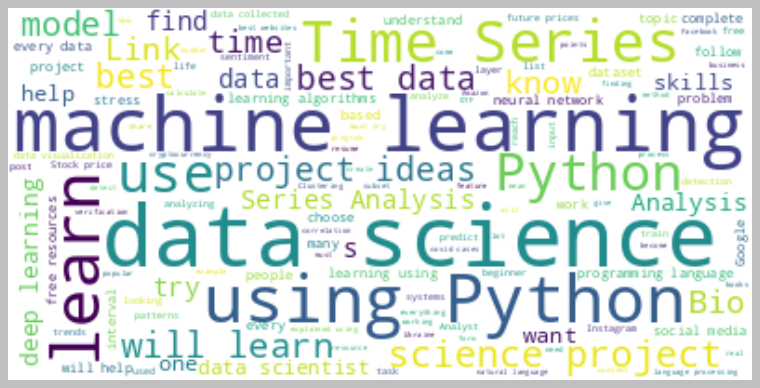

In [17]:
#Let's create wordclous of the caption column to look at the most used words in the caption of my Instagram posts.
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

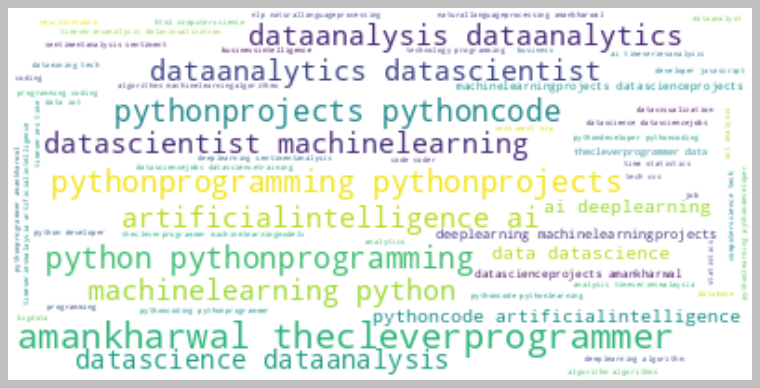

In [18]:
#Now, let's create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts.
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#Analyzing Relatioinships

In [21]:
#Analyzing Relatioinships
#Now, let's analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

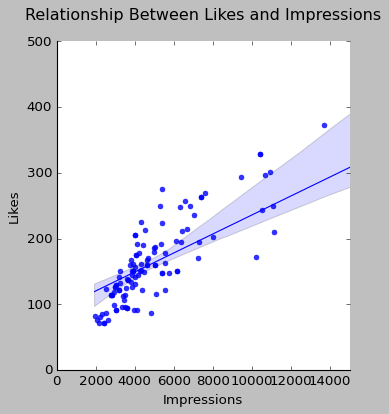

In [24]:
sns.lmplot(data=data, x="Impressions", y="Likes", fit_reg=True, scatter_kws={"s": 20}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Likes and Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 500)
plt.show()

#There is a linear relationship between the number of likes and the reach I got on Instagram. Now, let's see the relationship between the number of comments and the number of impressions on my Instagram posts.

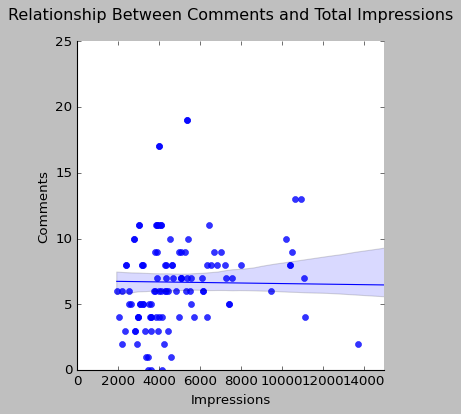

In [25]:
sns.lmplot(data=data, x="Impressions", y="Comments", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Comments and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 25)
plt.show()
#It looks like the number of comments we get on a post doesn't affect it's reach. Now, let's have a look at the relationship between the number of shares and the number of impressions.

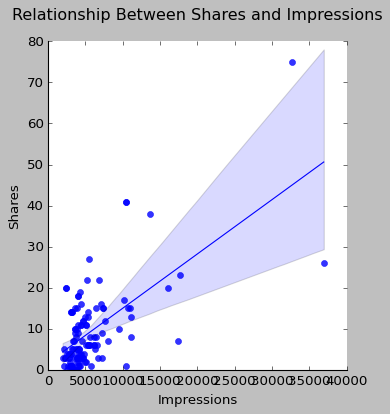

In [26]:
sns.lmplot(data=data, x="Impressions", y="Shares", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Shares and Impressions", pad=20)
plt.ylim(0, 80)
plt.xlim(0, 40000)
plt.show()
#A more number of shares will result in a higher reach, but shares don't affect the reach of a post as much as likes do. Now, let's have a look at the relationship between the number of saves and the number of impressions

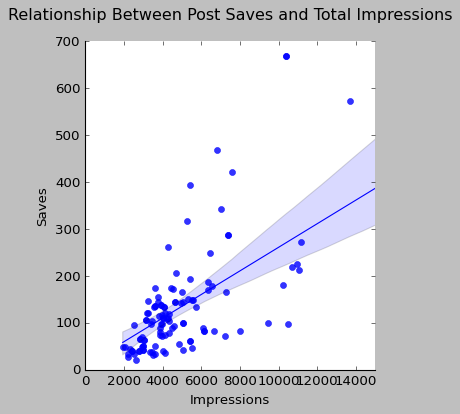

In [28]:
sns.lmplot(data=data, x="Impressions", y="Saves", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Post Saves and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 700)
plt.show()
#There is a linear relationship between the number of times my post is saved and the reach of my Instagram post. Now let’s have a look at the correlation of all the columns with the Impressions column.

In [31]:
#Analyzing Conversion Rate

In [32]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [33]:
#So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate. Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits.

Text(0.5, 1.0, 'Relationship Between Profile Visits and Followers Gained')

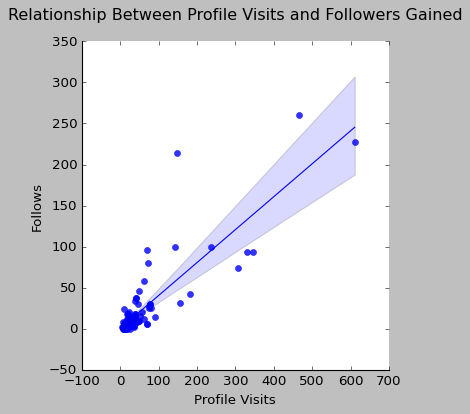

In [34]:
sns.lmplot(data=data, x="Profile Visits", y="Follows", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Profile Visits and Followers Gained", pad=20)

In [35]:
#The relationship between profile visits and followers gained is also linear.

In [36]:
# Instagram Reach Prediction Model
# Now in this section, I will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model.

In [37]:
X = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8894123745597847

In [39]:
# Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model.

In [40]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]

features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12491.01347863])